# Clustering

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn.experimental import (
    enable_iterative_imputer,
)
from sklearn import (
    ensemble,
    impute,
    model_selection,    
    preprocessing,
    tree,
)
from sklearn.ensemble import (
    RandomForestClassifier,
)
from yellowbrick.model_selection import (
    ValidationCurve,
)

url = ("https://hbiostat.org/data/repo/titanic3.csv")

df = pd.read_csv(url)
def tweak_titanic(df):
    df = df.drop(
        columns=[
            "name",
            "ticket",
            "home.dest",
            "boat",
            "body",
            "cabin",
        ]
    ).pipe(pd.get_dummies, drop_first=True)
    return df

def get_train_test_X_y(
    df, y_col, size=0.3, std_cols=None
):
    y = df[y_col]
    X = df.drop(columns=y_col)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(
        X, y, test_size=size, random_state=42
    )
    cols = X.columns
    num_cols = [
        "pclass",
        "age",
        "sibsp",
        "parch",
        "fare",
    ]
    fi = impute.IterativeImputer()

    fitted = fi.fit_transform(X_train[num_cols])
    X_train = X_train.assign(**{c:fitted[:,i] for i, c in enumerate(num_cols)})
    test_fit = fi.transform(X_test[num_cols])
    X_test = X_test.assign(**{c:test_fit[:,i] for i, c in enumerate(num_cols)})
    if std_cols:
        std = preprocessing.StandardScaler()
        fitted = std.fit_transform(X_train[std_cols])
        X_train = X_train.assign(**{c:fitted[:,i] for i, c in enumerate(std_cols)})
        test_fit = std.transform(X_test[std_cols])
        X_test = X_test.assign(**{c:test_fit[:,i] for i, c in enumerate(std_cols)})

    return X_train, X_test, y_train, y_test

ti_df = tweak_titanic(df)
std_cols = "pclass,age,sibsp,fare".split(",")
X_train, X_test, y_train, y_test = get_train_test_X_y(
    ti_df, "survived", std_cols=std_cols
)

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])


In [2]:
from sklearn.cluster import KMeans

In [3]:
X_std = preprocessing.StandardScaler().fit_transform(X)

km = KMeans(n_clusters=2, random_state=42)

km.fit(X_std)

/home/pcmoraes/Área de Trabalho/Editores de código/Inteligencia-Artificial/Livros/Machine Learning - Guia de Referência Rápida/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

In [4]:
X_km = km.predict(X)
X_km

/home/pcmoraes/Área de Trabalho/Editores de código/Inteligencia-Artificial/Livros/Machine Learning - Guia de Referência Rápida/.venv/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

/home/pcmoraes/Área de Trabalho/Editores de código/Inteligencia-Artificial/Livros/Machine Learning - Guia de Referência Rápida/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/home/pcmoraes/Área de Trabalho/Editores de código/Inteligencia-Artificial/Livros/Machine Learning - Guia de Referência Rápida/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/pcmoraes/Área de Trabalho/Editores de código/Inteligencia-Artificial/Livros/Machine Learning - Guia de Referência Rápida/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/pcmoraes/Área de Trabalho/Editores de código/Inteligencia-Artificial/Livros/Machine Learning - Guia de Referência Rápida/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: Th

Text(0, 0.5, 'Inertia')

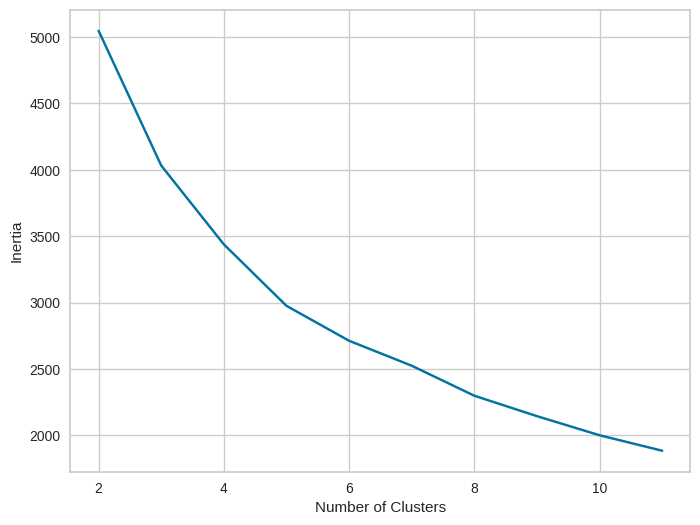

In [5]:
inertias = []

sizes = range(2,12)

for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(X)
    inertias.append(k2.inertia_)

fig, ax = plt.subplots(figsize=(8, 6))

pd.Series(inertias, index=sizes).plot(ax=ax)

ax.set_xlabel("Number of Clusters")

ax.set_ylabel("Inertia")

In [6]:
from sklearn import metrics

/home/pcmoraes/Área de Trabalho/Editores de código/Inteligencia-Artificial/Livros/Machine Learning - Guia de Referência Rápida/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/pcmoraes/Área de Trabalho/Editores de código/Inteligencia-Artificial/Livros/Machine Learning - Guia de Referência Rápida/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/pcmoraes/Área de Trabalho/Editores de código/Inteligencia-Artificial/Livros/Machine Learning - Guia de Referência Rápida/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: Th

array([[<Axes: xlabel='k'>, <Axes: xlabel='k'>],
       [<Axes: xlabel='k'>, <Axes: xlabel='k'>]], dtype=object)

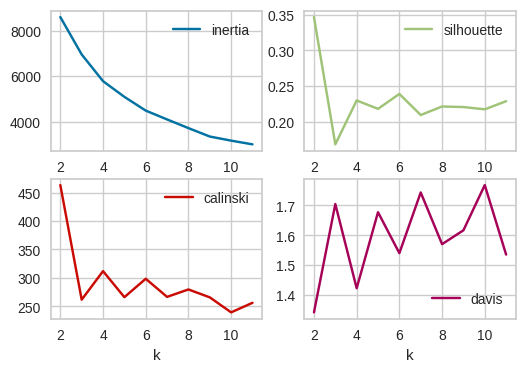

In [7]:
inertias = []
sils = []
chs = []
dbs = []
sizes = range(2, 12)
for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(X_std)
    inertias.append(k2.inertia_)
    sils.append(
        metrics.silhouette_score(X, k2.labels_)
    )
    chs.append(
        metrics.calinski_harabasz_score(
            X, k2.labels_
        )
    )
    dbs.append(
        metrics.davies_bouldin_score(
            X, k2.labels_
        )
    )
fig, ax = plt.subplots(figsize=(6, 4))
(
    pd.DataFrame(
        {
            "inertia": inertias,
            "silhouette": sils,
            "calinski": chs,
            "davis": dbs,
            "k": sizes,
        }
    )
    .set_index("k")
    .plot(ax=ax, subplots=True, layout=(2, 2))
)

/home/pcmoraes/Área de Trabalho/Editores de código/Inteligencia-Artificial/Livros/Machine Learning - Guia de Referência Rápida/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/pcmoraes/Área de Trabalho/Editores de código/Inteligencia-Artificial/Livros/Machine Learning - Guia de Referência Rápida/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/pcmoraes/Área de Trabalho/Editores de código/Inteligencia-Artificial/Livros/Machine Learning - Guia de Referência Rápida/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: Th

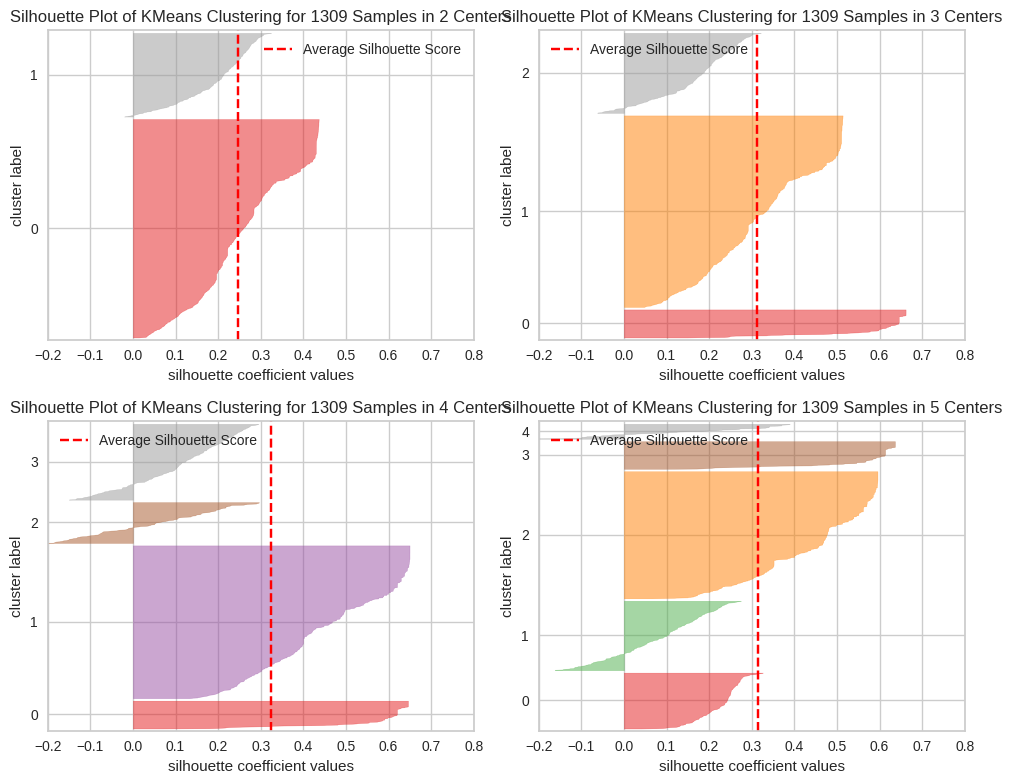

In [8]:
from yellowbrick.cluster.silhouette import SilhouetteVisualizer

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes = axes.reshape(4)

for i, k in enumerate(range(2,6)):

    ax = axes[i]

    sil = SilhouetteVisualizer(
        KMeans(n_clusters=k, random_state=42),
        ax=ax
    )

    sil.fit(X_std)
    sil.finalize()

    ax.set_xlim(-0.2, 0.8)

plt.tight_layout()



In [9]:
from scipy.cluster import hierarchy

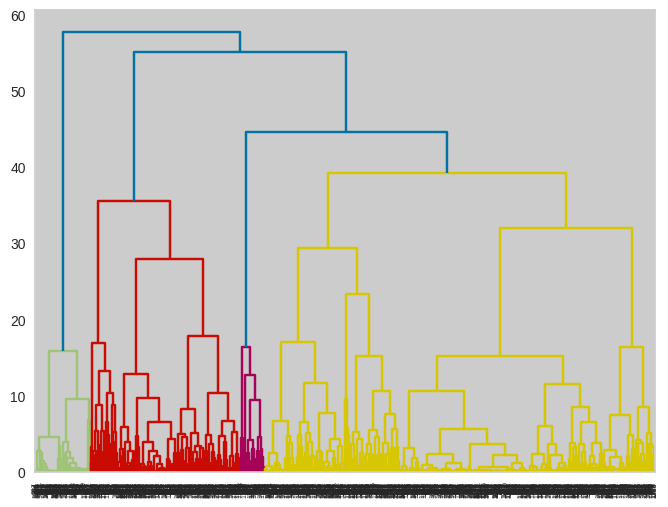

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))

dend = hierarchy.dendrogram(
    hierarchy.linkage(X_std, method="ward"),
)

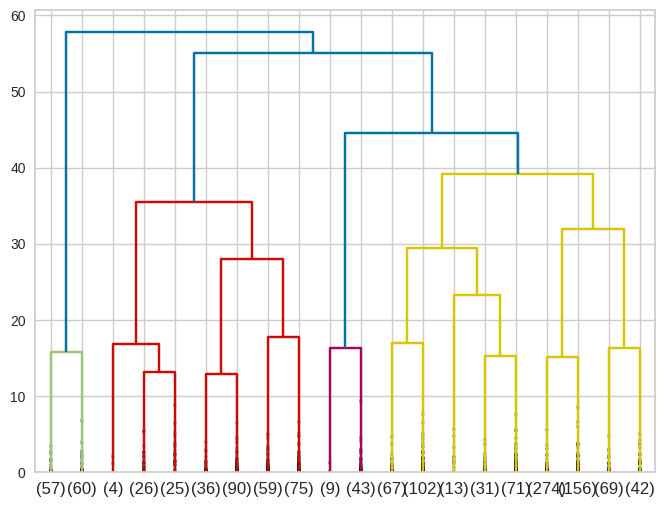

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))

dend = hierarchy.dendrogram(
    hierarchy.linkage(X_std, method="ward"),
    truncate_mode="lastp",
    p=20,
    show_contracted=True,
)

In [12]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(
    n_clusters=4,
    affinity='euclidean',
    linkage='ward'
)

In [13]:
ag.fit(X)

/home/pcmoraes/Área de Trabalho/Editores de código/Inteligencia-Artificial/Livros/Machine Learning - Guia de Referência Rápida/.venv/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [18]:
import fastcluster

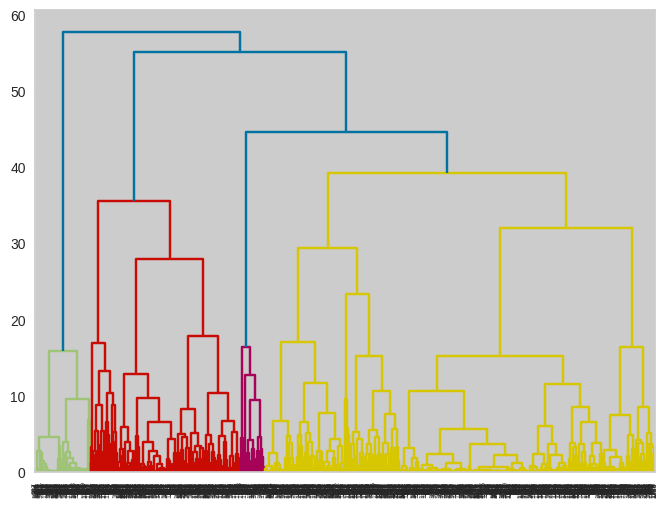

In [19]:

Z = fastcluster.linkage_vector(X_std, method="ward")

fig, ax = plt.subplots(figsize=(8, 6))

dend = hierarchy.dendrogram(Z)



## Entendendo os clusters

In [20]:
km = KMeans(n_clusters=2, random_state=42)

km.fit(X_std)
labels = km.predict(X_std)

(
    X.assign(cluster=labels, survived=y)
    .groupby("cluster")
    .agg(['mean', 'var'])
    .T
)

/home/pcmoraes/Área de Trabalho/Editores de código/Inteligencia-Artificial/Livros/Machine Learning - Guia de Referência Rápida/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster                 0         1
pclass     mean  0.527478 -1.420910
           var   0.265532  0.138897
age        mean -0.281924  0.922531
           var   0.651164  1.145409
sibsp      mean -0.009948 -0.108926
           var   1.164827  0.303463
parch      mean  0.387949  0.377410
           var   0.830288  0.539488
fare       mean -0.349293  0.882876
           var   0.056372  2.223786
sex_male   mean  0.678647  0.553719
           var   0.218316  0.247797
embarked_Q mean  0.123679  0.016529
           var   0.108497  0.016301
embarked_S mean  0.741015  0.586777
           var   0.192115  0.243140
survived   mean  0.300211  0.595041
           var   0.210307  0.241633

In [21]:
# aplicando .style.backgroud_gradient() para colorir as células

(
    X.assign(cluster=labels, survived=y)
    .groupby("cluster")
    .agg(['mean', 'var'])
    .T
    .style.background_gradient()
)

<Axes: >

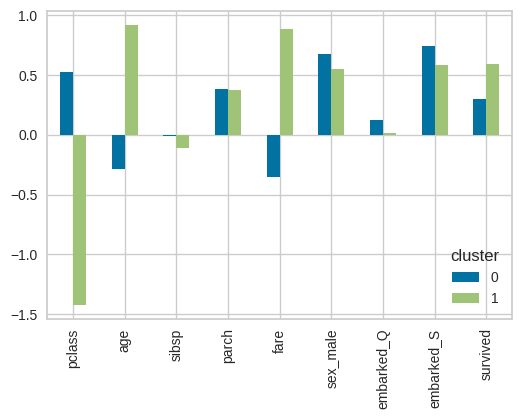

In [22]:
fig, ax = plt.subplots(figsize=(6,4))

(
    X.assign(cluster=labels, survived=y)
    .groupby("cluster")
    .mean()
    .T.plot.bar(ax=ax)
)

In [23]:
import seaborn as sns

In [24]:
# definindo X_pca
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)

X_pca = pca.fit_transform(X_std)

<Axes: xlabel='PC1', ylabel='PC2'>

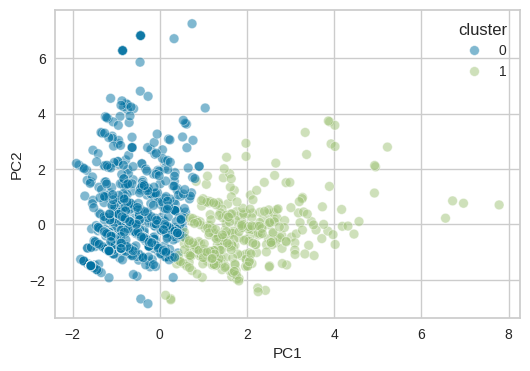

In [28]:
fig, ax = plt.subplots(figsize=(6,4))

data = X.assign(
    PC1=X_pca[:,0],
    PC2=X_pca[:,1],
    cluster=labels,
)

sns.scatterplot(
    x="PC1",
    y="PC2",
    data=data,
    hue='cluster',
    alpha=0.5,
    ax=ax
)


In [29]:
(
    X.assign(cluster=labels)
    .groupby("cluster")
    .age.describe()
    .T
)

cluster,0,1
count,946.000000,363.000000
mean,-0.281924,0.922531
std,0.806947,1.070238
min,-2.220991,-2.162462
25%,-0.628413,0.184938
50%,-0.175243,0.809247
75%,0.106899,1.667671
max,3.540597,4.008828


In [30]:
dt = tree.DecisionTreeClassifier(
    max_depth=3, random_state=42
)

dt.fit(X, labels)
for col, val in sorted(
    zip(X.columns, dt.feature_importances_),
    key=lambda x: x[1], reverse=True
):
    print(f"{col:10}{val:10.3f}")

pclass         0.926
age            0.074
sibsp          0.000
parch          0.000
fare           0.000
sex_male       0.000
embarked_Q     0.000
embarked_S     0.000


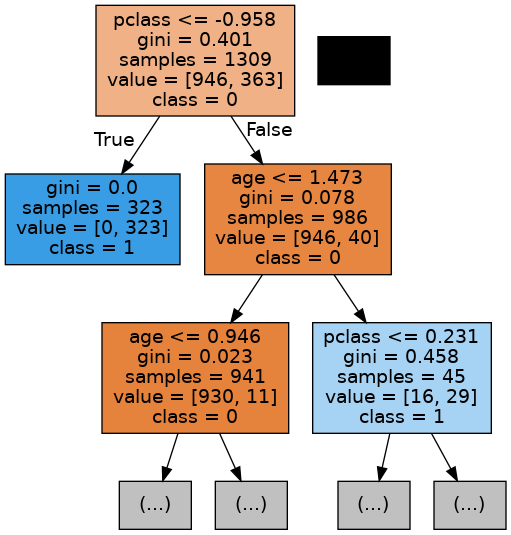

In [40]:
from io import StringIO
import pydotplus
from IPython.display import Image



dot_data = StringIO()

tree.export_graphviz(
    dt,
    out_file=dot_data,
    feature_names=X.columns,
    class_names=["0", "1"],
    max_depth=2,
    filled=True,
)

g = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(g.create_png())
